In [ ]:
!pip install langgraph-checkpoint
!pip install langgraph-checkpoint-sqlite


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 5.8 MB/s eta 0:00:00


In [ ]:
!pip install langgraph-checkpoint-sqlite

In [ ]:
pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 3.8 MB/s eta 0:00:00


In [ ]:
pip install dotenv

In [ ]:
pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [ ]:
!ollama run llama3


/bin/bash: line 1: ollama: command not found


In [ ]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages:Annotated[list,add_messages]

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm=ChatGroq(model="llama3-8b-8192")

In [ ]:
llm=init_chat_model("groq:llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7a3092ef06d0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7a3092ef1490>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [ ]:
graph_builder=StateGraph(State)

## Adding node
graph_builder.add_node("llmchatbot",chatbot)
## Adding Edges
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

## compile the graph
graph=graph_builder.compile()

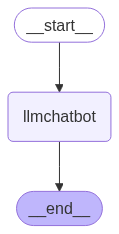

In [ ]:
## Visualize the graph
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [ ]:
response=graph.invoke({"messages":"Hi"})

In [ ]:
response["messages"][-1].content

"Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?"

In [ ]:
for event in graph.stream({"messages":"Hi how are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

I'm just a large language model, I don't have feelings or emotions like humans do, but I'm functioning properly and ready to help you with any questions or tasks you may have! It's great to chat with you. Is there something specific you'd like to talk about or ask me?


In [ ]:
!pip install langchain_tavily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 36.3 MB/s eta 0:00:00


In [ ]:
from langchain_tavily import TavilySearch

tool=TavilySearch(max_results=2)
tool.invoke("what is langchain?")


{'query': 'what is langchain?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Introduction | ️ LangChain',
   'url': 'https://python.langchain.com/docs/introduction/',
   'content': "*   Build a simple LLM application with chat models and prompt templates *   How to migrate from legacy LangChain agents to LangGraph *   How to use chat models to call tools *   How to pass tool outputs to chat models *   **`langchain`**: Chains, agents, and retrieval strategies that make up an application's cognitive architecture. However, these guides will help you quickly accomplish common tasks using chat models, vector stores, and other common LangChain components. LangChain is part of a rich ecosystem of tools that integrate with our framework and build on top of it. If you're looking to get up and running quickly with chat models, vector stores, or other LangChain components from a specific provider, check out our growing list of integrations.",
   'score': 0

In [ ]:
def multiply(a:int,b:int)->int:
    """Multiply a and b

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: output int
    """
    return a*b

In [ ]:
tools=[tool,multiply]

In [ ]:
llm_with_tool=llm.bind_tools(tools)

In [ ]:
llm_with_tool

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7a3092ef06d0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7a3092ef1490>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': [], 'description': 'A list of domai

In [ ]:
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [ ]:
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

In [ ]:
builder = StateGraph(State)
builder.add_node("tool_calling_chat", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_chat")
builder.add_conditional_edges("tool_calling_chat", tools_condition)
builder.add_edge("tools", END)

graph = builder.compile()


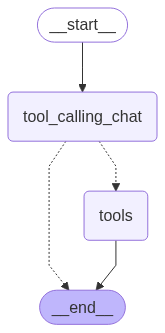

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
response=graph.invoke({"messages":"what is the recent ai news"})

In [ ]:
response["messages"][-1].content

'{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.crescendo.ai/news/latest-ai-news-and-updates", "title": "Latest AI Breakthroughs and News: May-June 2025 - Crescendo.ai", "content": "**Date:** June 20, 2025  \\n**Summary:** A new four-legged AI robot developed in China can play badminton with humans, reacting in real-time to shots. The quadruped robot uses vision, sensor data, and machine learning to anticipate movements and adjust its strategy. Researchers say this showcases the future of human-robot collaboration in sports and training. The project blends physical robotics with advanced AI reasoning. [...] **Date:** May 30, 2025  \\n**Summary:** Nvidia CEO Jensen Huang issued a bold warning about the rapid evolution of AI, emphasizing that people who fail to adopt AI in their workflow risk being replaced by those who do. His comments underline the urgency for upskilling in a transforming job market. [...] **Date:

In [ ]:
for m in response["messages"]:
  m.pretty_print()

================================ Human Message =================================

what is the recent ai news
================================== Ai Message ==================================
Tool Calls:
  tavily_search (9ms7dwcgt)
 Call ID: 9ms7dwcgt
  Args:
    query: recent ai news
    search_depth: advanced
    time_range: day
    topic: general
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.crescendo.ai/news/latest-ai-news-and-updates", "title": "Latest AI Breakthroughs and News: May-June 2025 - Crescendo.ai", "content": "**Date:** June 20, 2025  \n**Summary:** A new four-legged AI robot developed in China can play badminton with humans, reacting in real-time to shots. The quadruped robot uses vision, sensor data, and machine learning to anticipate movements and adjust its strategy. Researchers say this showcas

In [ ]:
response=graph.invoke({"messages":"what is 5 muliplied by 2"})
for m in response["messages"]:
  m.pretty_print()

================================ Human Message =================================

what is 5 muliplied by 2
================================== Ai Message ==================================
Tool Calls:
  multiply (jmfm9pwwb)
 Call ID: jmfm9pwwb
  Args:
    a: 5
    b: 2
================================= Tool Message =================================
Name: multiply

10


# REACT agent


In [ ]:
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

builder = StateGraph(State)
builder.add_node("tool_calling_chat", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_chat")
builder.add_conditional_edges("tool_calling_chat", tools_condition)
builder.add_edge("tools","tool_calling_chat")
graph = builder.compile()


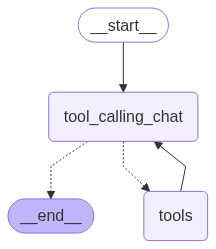

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
response=graph.invoke({"messages":"give me the react ai news and what is 5 muliplied by 2"})
for m in response["messages"]:
  m.pretty_print()

================================ Human Message =================================

give me the react ai news and what is 5 muliplied by 2
================================== Ai Message ==================================
Tool Calls:
  tavily_search (8rgc94ey9)
 Call ID: 8rgc94ey9
  Args:
    query: react ai news
    search_depth: advanced
    time_range: day
    topic: general
  multiply (fvnn29mme)
 Call ID: fvnn29mme
  Args:
    a: 5
    b: 2
================================= Tool Message =================================
Name: tavily_search

{"query": "react ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://hackertab.dev/topics/javascript/react", "title": "React News for developers - Hackertab", "content": "Discover the latest React development news, repositories, and conferences at Hackertab. Latest React articles", "score": 0.60805947, "raw_content": null}, {"url": "https://www.reddit.com/r/reactjs/", "title": "/r/ReactJS - The Front Pa

# ADDING MEMORY IN AGENTIC GRAPH

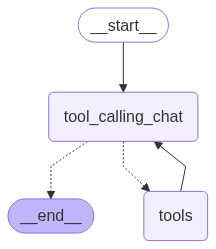

In [ ]:
# For in-memory checkpointing
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

memory=MemorySaver()

def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

builder = StateGraph(State)
builder.add_node("tool_calling_chat", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_chat")
builder.add_conditional_edges("tool_calling_chat", tools_condition)
builder.add_edge("tools","tool_calling_chat")
graph = builder.compile(checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
config={"configurable":{"thread_id":"1"}}
response=graph.invoke({"messages":"hi my name is dexter"},config=config)

In [ ]:
response["messages"][-1].content

'Nice to meet you, Dexter!'

In [ ]:
response=graph.invoke({"messages":"what is my name"},config=config)

In [ ]:
response["messages"][-1].content

'Your name is Dexter.'

# STREAMING

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()


In [ ]:
def superbot(state:State):
  return {"messages":[llm.invoke(state["messages"])]}

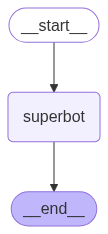

In [ ]:
graph=StateGraph(State)
graph.add_node("superbot",superbot)
graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)

graph_builder=graph.compile(checkpointer=memory)

from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [ ]:
config={"configurable":{"thread_id":"3"}}

for chunk in graph_builder.stream({"messages":"hi my name is dexter and i like cricket"},config,stream_mode="updates"):

  print(chunk)

{'superbot': {'messages': [AIMessage(content="Hi Dexter! Nice to meet you! It's great that you like cricket! What's your favorite team or player? Are you a fan of Test cricket, One-Day Internationals (ODIs), or Twenty20 (T20) matches?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 20, 'total_tokens': 71, 'completion_time': 0.071221544, 'prompt_time': 0.006926573, 'queue_time': 0.102330961, 'total_time': 0.078148117}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--1f513774-7df0-47fe-8039-556f02b01dfd-0', usage_metadata={'input_tokens': 20, 'output_tokens': 51, 'total_tokens': 71})]}}


In [ ]:
for chunk in graph_builder.stream({"messages":"hi my name is dexter and i like cricket"},config,stream_mode="values"):

  print(chunk)

{'messages': [HumanMessage(content='hi my name is dexter and i like cricket', additional_kwargs={}, response_metadata={}, id='777dd7ce-7d41-4243-bd1a-50ecde215c7d'), AIMessage(content="Hi Dexter! Nice to meet you! It's great that you like cricket! What's your favorite team or player? Are you a fan of Test cricket, One-Day Internationals (ODIs), or Twenty20 (T20) matches?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 20, 'total_tokens': 71, 'completion_time': 0.071221544, 'prompt_time': 0.006926573, 'queue_time': 0.102330961, 'total_time': 0.078148117}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--1f513774-7df0-47fe-8039-556f02b01dfd-0', usage_metadata={'input_tokens': 20, 'output_tokens': 51, 'total_tokens': 71}), HumanMessage(content='hi my name is dexter and i like cricket', additional_kwargs={}, response_metadata={}, id='12541f09-110a-4ba2-a892-6c0a65

In [ ]:
pip install langchain

In [ ]:
import os
from langchain.chat_models import init_chat_model
llm=init_chat_model("groq:llama3-8b-8192")

In [ ]:
from typing import Annotated
from langchain_tavily import TavilySearch
from langchain_core.tools import tool
from typing_extensions import TypedDict

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

from langgraph.types import Command,interrupt



In [ ]:
class State(TypedDict):
  messages: Annotated[list,add_messages]

In [ ]:
graph_builder=StateGraph(State)

@tool
def human_assistance(query:str)-> str:
